In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from highlight_text import fig_text, ax_text

from PIL import Image
import urllib
import json
import os

plt.style.use('./assets/stylesheets/soc_base.mplstyle')

In [104]:
df = pd.read_csv('data/league_two_xg.csv',index_col=0)

In [105]:
top_10 = [
    8351, 6350, 8651, 10253, 8484,
    282326, 9818, 10005, 9784,158316,    
]
top_10_colors=[
    '#ed2227', '#2a4b80', '#8c2d42', '#ac152a','#7f1734', 
    '#000000', '#faac28', '#000000', '#182544', '#00669d',    
]

In [106]:
def plot_scatter_xg(ax, team_id, color='red',label_x=False,label_y=False):
    ax.grid(ls='--',color='lightgrey')
    #filter data
    df_aux_h = df[(df['team_id'] == team_id) & (df['venue'] == 'H')]
    df_aux_a = df[(df['team_id'] == team_id) & (df['venue'] == 'A')]
    
    #scatter plot
    ax.scatter(
        df[df['variable'] == 'xG_ag']['value'], df[df['variable'] == 'xG_for']['value'], 
        alpha=.1, lw=1,
        zorder=3, s=20
    )
    ax.scatter(
        df_aux_h[df_aux_h['variable'] == 'xG_ag']['value'], df_aux_h[df_aux_h['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec='black', fc=color,
        zorder=3, s=40
    )
    ax.scatter(
        df_aux_a[df_aux_a['variable'] == 'xG_ag']['value'], df_aux_a[df_aux_a['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec=color, fc='white',
        zorder=3, s=40, hatch='///////'
    )
    
    #set limits
    ax.set_xlim(0,round(df['value'].max()+.5))
    ax.set_ylim(0,round(df['value'].max()+.5))
    ax.plot(
        [0,ax.get_xlim()[1]], [0,ax.get_ylim()[1]],
        ls='--', color='black', lw=1,
        zorder=2
    )
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    if label_x:
        ax.set_xlabel('xGA (xG conceded)')
    if label_y:
        ax.set_ylabel('xGF (xG created)')
    return ax

<AxesSubplot: xlabel='xGA (xG conceded)', ylabel='xGF (xG created)'>

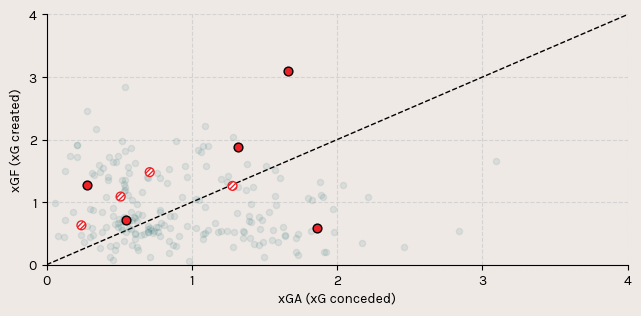

In [107]:
ax = plt.subplot(111)
plot_scatter_xg(ax,8351,'#ed2227',True,True)

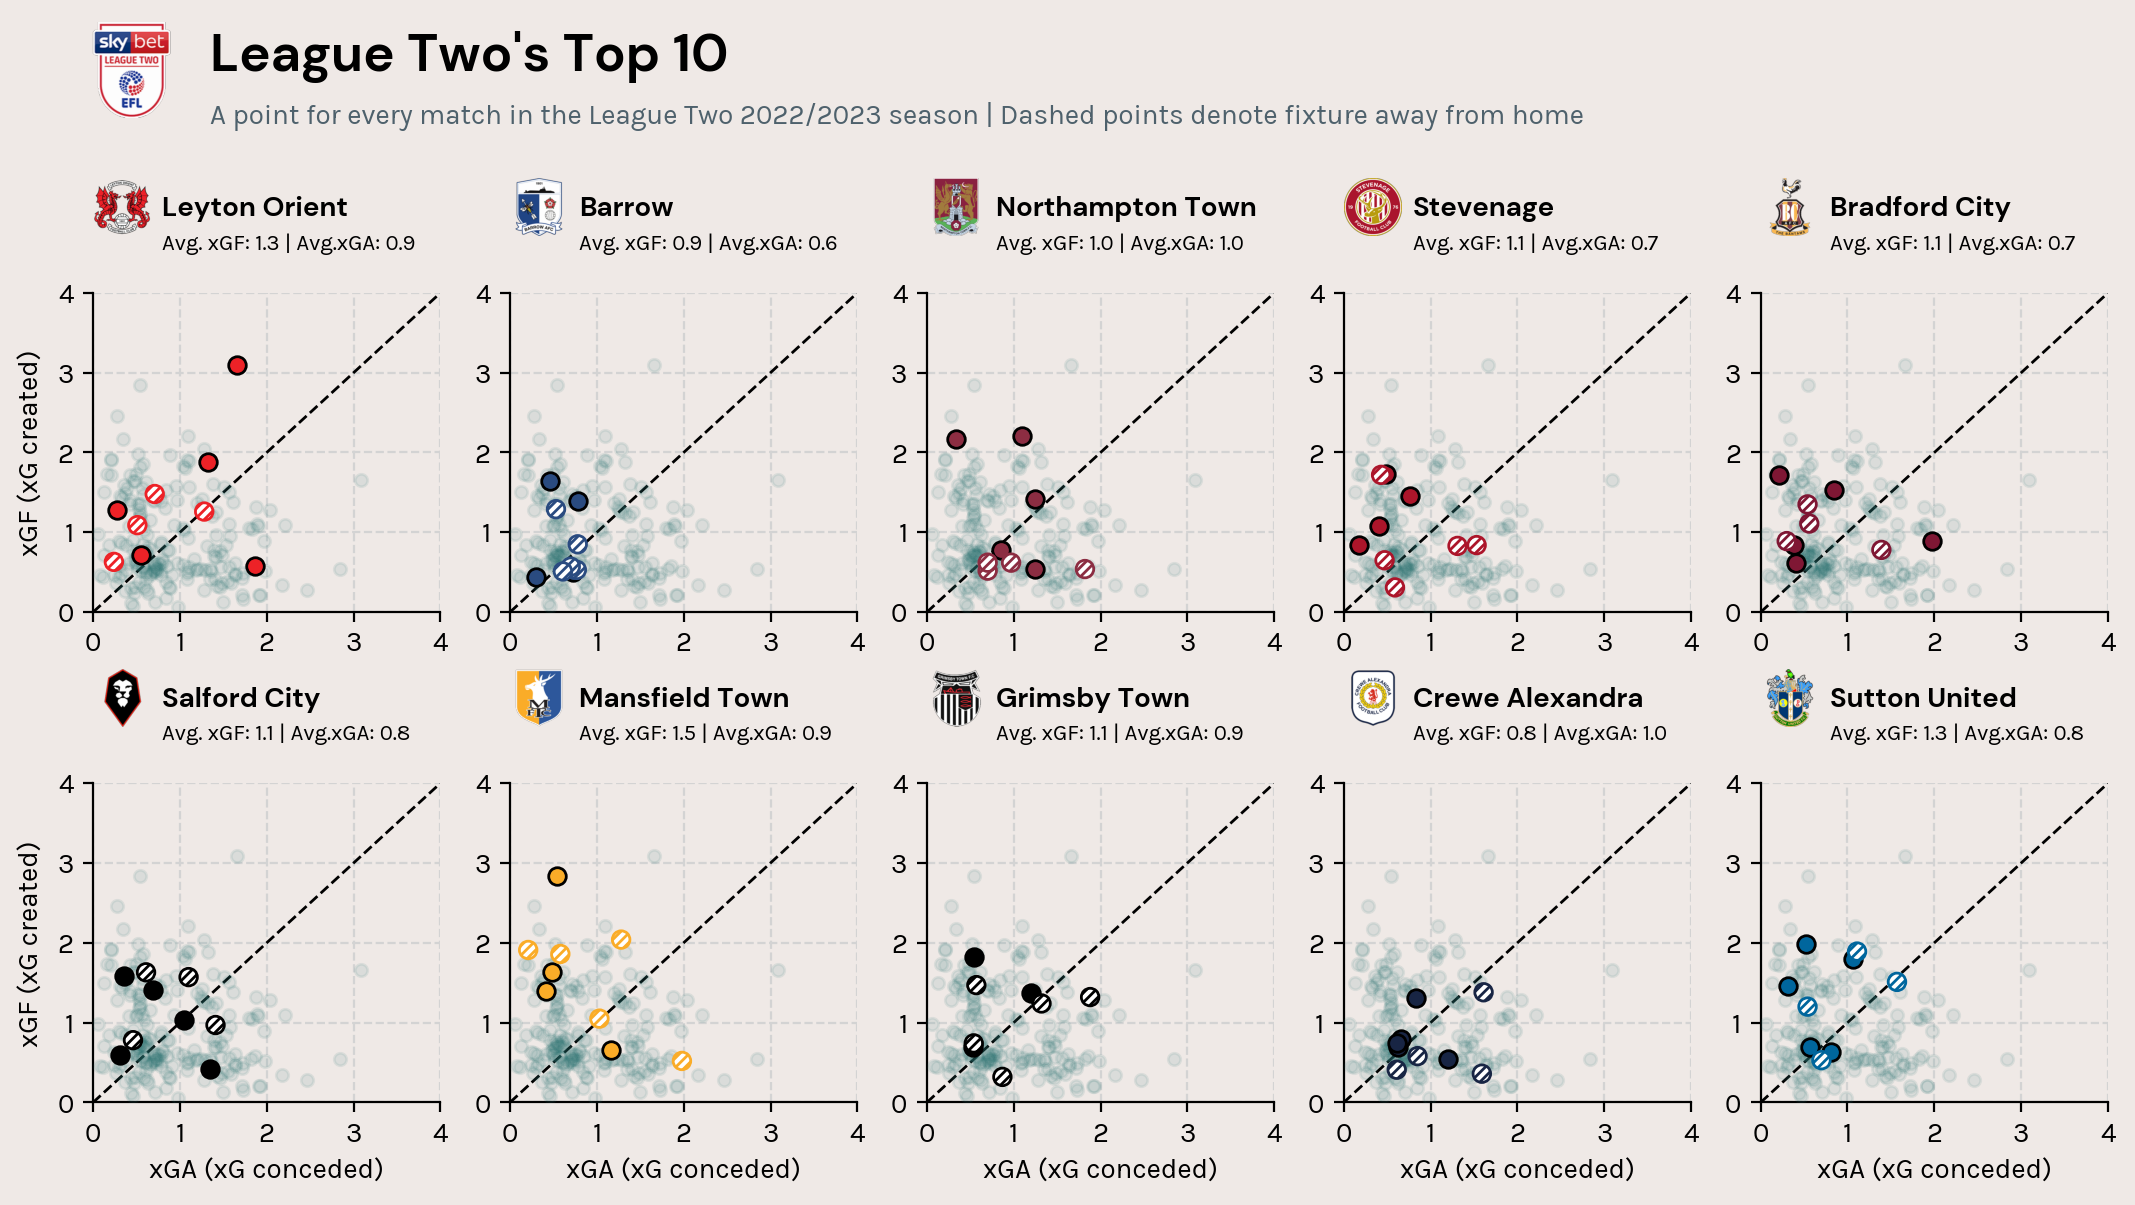

In [109]:
fig = plt.figure(figsize=(13,6), dpi = 200)
nrows = 4
ncols = 5
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig,
    height_ratios=[(1/nrows)*2.35 if x%2!=0 else (1/nrows)/2.35 for x in range(nrows)], hspace=.3
)

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row%2 != 0:
            ax = plt.subplot(
                gspec[row,col],
                facecolor = '#EFE9E6'
            )
            teamId = top_10[plot_counter]
            color = top_10_colors[plot_counter]
            
            if col == 0:
                label_y = True
            else:
                label_y = False
            if row == 3:
                label_x = True
            else:
                label_x = False
            
            plot_scatter_xg(ax,teamId,color,label_x,label_y)
            plot_counter += 1
        else:
            teamId = top_10[logo_counter]
            teamName = df[df['team_id']==teamId]['team_name'].iloc[0]
            avg_xG_for = df[(df['team_id']==teamId) & (df['variable']=='xG_for')]['value'].mean()
            avg_xG_ag = df[(df['team_id']==teamId) & (df['variable']=='xG_ag')]['value'].mean()
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png'))
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # add team name
            ax_text(
                x= 1.2,
                y=.7,
                s=f'<{teamName}>\n<Avg. xGF: {avg_xG_for:.1f} | Avg.xGA: {avg_xG_ag:.1f}>',
                ax = logo_ax,
                highlight_textprops=[{'weight':'bold','font':'DM Sans'},{'size':'8'}],
                font = 'Karla',
                ha='left',
                size = 10,
                annotationbbox_kw={'xycoords':'axes fraction'}
            )
            logo_counter += 1
            
fig_text(
    x = .17, y=.96,
    s='League Two\'s Top 10',
    va='bottom', ha='left',
    fontsize=19, color='black', font='DM Sans', weight = 'bold'
)

fig_text(
    x=.17, y=.92,
    s='A point for every match in the League Two 2022/2023 season | Dashed points denote fixture away from home',
    va='bottom', ha='left',
    fontsize = 10, color = '#4E616C', font = 'Karla'
)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes([.1,.93,.08,.08])
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{109:.0f}.png'))
logo_ax.imshow(club_icon)
logo_ax.axis('off')

plt.savefig("figures/league_two_xG.png",dpi=600,facecolor='#EFE9E6',bbox_inches="tight",edgecolor="none",transparent=False)